<a href="https://colab.research.google.com/github/bala909/Churm-telecom-industry/blob/main/churn_telecom_industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
from pandas import DataFrame

pd.set_option("display.max_columns", 50)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.contingency import chi2_contingency
from scipy.stats import normaltest, shapiro
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

import matplotlib

matplotlib.rcParams["axes.labelsize"] = 9
matplotlib.rcParams["legend.fontsize"] = 9
matplotlib.rcParams["ytick.labelsize"] = 9
matplotlib.rcParams["xtick.labelsize"] = 9
# plt.style.use('classic')

In [ ]:
df = pd.read_csv("/content/Telco_customer_churn.csv.zip")
df.head(20)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,No,Yes,No,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,Yes,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,No,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


In [ ]:
df.tail(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7033,0871-OPBXW,1,United States,California,Twentynine Palms,92277,"34.17211, -115.769773",34.172110,-115.769773,Female,No,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No,0,80,5191,NaN
7034,3605-JISKB,1,United States,California,Twentynine Palms,92278,"34.457829, -116.139589",34.457829,-116.139589,Male,Yes,Yes,No,55,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,No,0,71,4212,NaN
7035,9767-FFLEM,1,United States,California,Westmorland,92281,"33.03679, -115.60503",33.036790,-115.605030,Male,No,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No,0,35,4591,NaN
7036,8456-QDAVC,1,United States,California,Winterhaven,92283,"32.852947, -114.850784",32.852947,-114.850784,Male,No,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No,0,20,2464,NaN
7037,7750-EYXWZ,1,United States,California,Yucca Valley,92284,"34.159534, -116.425984",34.159534,-116.425984,Female,No,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No,0,24,3740,NaN
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


In [ ]:
n_rows, n_columns = df.shape
print(f"Number of columns: {n_columns} columns\nNumber of rws: {n_rows} rows")

Number of columns: 33 columns
Number of rws: 7043 rows


In [ ]:
df.dtypes

,0
CustomerID,object
Count,int64
Country,object
State,object
City,object
Zip Code,int64
Lat Long,object
Latitude,float64
Longitude,float64
Gender,object


In [ ]:
total_charge = df["Total Charges"]
missing = total_charge[~total_charge.str.replace(".", "").str.isdigit()]
print("Number of missing total charge: ", len(missing))
missing.head()

Number of missing total charge:  11


,Total Charges
2234,
2438,
2568,
2667,
2856,


In [ ]:
# Coverting the total charge column to numeric
df["Total Charges"] = df["Total Charges"].apply(pd.to_numeric, errors="coerce")

In [ ]:
styled_df = (
    df.describe()
    .drop("count", axis=0)
    .style.background_gradient(axis=0, cmap="magma")
    .set_properties(**{"text-align": "center"})
    .set_table_styles([{"selector": "th", "props": [("background-color", "k")]}])
    .set_caption("Summary Statistics")
)

styled_df

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
mean,1.000000,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.000000,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,1.000000,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.000000,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,1.000000,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.000000,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,1.000000,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


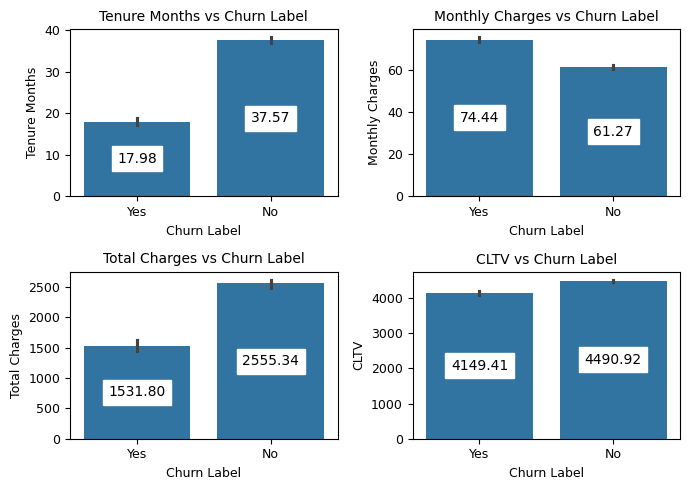

In [ ]:
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns.drop(
    ["Churn Value", "Latitude", "Longitude", "Churn Score", "Count", "Zip Code"]
)

fig, axes = plt.subplots(2, 2, figsize=(7, 5))
axes = axes.flatten()
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    sns.barplot(data=df, x="Churn Label", y=column, ax=ax, estimator=np.mean)
    ax.set_title(f"{column} vs Churn Label", fontsize=10)

    for k in ax.containers:
        ax.bar_label(
            k, fontsize=10, label_type="center", backgroundcolor="w", fmt="%.2f"
        )
fig.add_axes(axes[-1])
plt.tight_layout()
plt.show()

In [ ]:
def get_unique(dataframe: DataFrame):

    cat_cols = dataframe.select_dtypes(exclude="number")
    uni_values = []
    counts = []
    pct = []

    for col in cat_cols.columns:
        uni_value, count = np.unique(
            np.array(cat_cols[col], dtype=str), return_counts=True
        )
        uni_values.append(uni_value)
        counts.append(count)
        pct.append(np.round(count / count.sum() * 100, 2))

    return pd.DataFrame(
        {
            "dtype": cat_cols.dtypes,
            "unique_values": uni_values,
            "counts": [len(val) for val in uni_values],
            "values_count": counts,
            "pct": pct,
        }
    )

In [ ]:
get_unique(df)

,dtype,unique_values,counts,values_count,pct
CustomerID,object,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF...",7043,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0..."
Country,object,[United States],1,[7043],[100.0]
State,object,[California],1,[7043],[100.0]
City,object,"[Acampo, Acton, Adelanto, Adin, Agoura Hills, ...",1129,"[4, 4, 5, 4, 5, 4, 4, 8, 4, 4, 4, 4, 10, 4, 4,...","[0.06, 0.06, 0.07, 0.06, 0.07, 0.06, 0.06, 0.1..."
Lat Long,object,"[32.555828, -117.040073, 32.578103, -117.01297...",1652,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.0..."
Gender,object,"[Female, Male]",2,"[3488, 3555]","[49.52, 50.48]"
Senior Citizen,object,"[No, Yes]",2,"[5901, 1142]","[83.79, 16.21]"
Partner,object,"[No, Yes]",2,"[3641, 3402]","[51.7, 48.3]"
Dependents,object,"[No, Yes]",2,"[5416, 1627]","[76.9, 23.1]"
Phone Service,object,"[No, Yes]",2,"[682, 6361]","[9.68, 90.32]"


In [ ]:
categorical_columns = df.dtypes[df.dtypes == "object"].index.drop(
    [
        "Churn Label",
        "Churn Reason",
        "City",
        "CustomerID",
        "Country",
        "State",
        "Lat Long",
    ]
)

categorical_counts = pd.DataFrame(
    columns=["No", "Yes"], index=pd.MultiIndex.from_tuples([("Group 1", "A")])
)

for column in categorical_columns:
    table = pd.crosstab(index=df[column], columns=df["Churn Label"])
    index = pd.MultiIndex.from_tuples(
        list(zip([column] * df[column].nunique(), df[column].unique()))
    )
    table.index = index
    categorical_counts = pd.concat([categorical_counts, table])

categorical_counts.drop(categorical_counts.index[0], inplace=True)

categorical_counts.style.bar(
    axis=0, subset=["No", "Yes"], align=100, width=100, height=70, color="cyan"
)

In [ ]:
cat_cols = df[categorical_columns]

fig, axes = plt.subplots(4, 4, figsize=(20, 18), dpi=500)
axes = axes.flatten()
fig.suptitle("Churn by Category", fontsize=25, fontweight="bold", y=1)

for i, col in enumerate(cat_cols.columns):
    ax = axes[i]
    sns.countplot(data=df, x=col, hue="Churn Label", ax=ax, palette="Set2")
    ax.legend(frameon=True, facecolor="inherit", shadow=True)
    ax.set_title(f"Churn by {col}", fontsize=13)
    plt.tight_layout(pad=0.6)

    for i in ax.containers:
        ax.bar_label(i, fontsize=13)

plt.tight_layout()

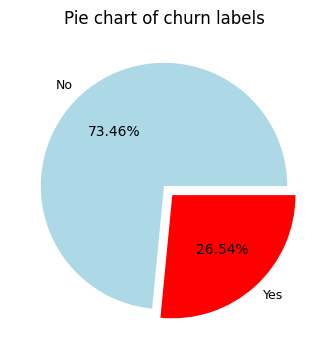

In [ ]:
# Getting a sense of the percentage of churn labels
churn_label_count = df["Churn Label"].value_counts()
fig = plt.figure(figsize=(7, 4), dpi=100)
plt.pie(
    churn_label_count,
    autopct="%.2f%%",
    labels=churn_label_count.index,
    colors=["lightblue", "red"],
    explode=[0, 0.1],
)
plt.title("Pie chart of churn labels")
plt.show()

In [ ]:
reasons = df["Churn Reason"][df["Churn Reason"].notna()]
reasons = reasons.value_counts().to_frame()
reasons.index.name = "Churn Reason"
reasons.columns = ["counts"]
reasons = reasons.assign(percent=lambda x: x / reasons["counts"].sum())

formater = lambda x: f"{x:.2%}"
reasons["percent"] = reasons.percent.apply(formater)
reasons.reset_index(inplace=True)
reasons

,Churn Reason,counts,percent
0,Attitude of support person,192,10.27%
1,Competitor offered higher download speeds,189,10.11%
2,Competitor offered more data,162,8.67%
3,Don't know,154,8.24%
4,Competitor made better offer,140,7.49%
5,Attitude of service provider,135,7.22%
6,Competitor had better devices,130,6.96%
7,Network reliability,103,5.51%
8,Product dissatisfaction,102,5.46%
9,Price too high,98,5.24%


In [ ]:
fig = px.treemap(
    data_frame=reasons,
    path=["Churn Reason"],
    values="counts",
    custom_data=["percent"],
    width=800,
    height=500,
    title="Churn Reasons Treemap",
)

fig.update_traces(
    hovertemplate="%{label}<br>Count: %{value}<br>Percentage: %{customdata[0]}",
    textinfo="label+value+percent entry"
)
fig.update_layout(margin=dict(t=30, l=10, r=10, b=10), title_x=0.5, title_y=0.96)
fig.show()

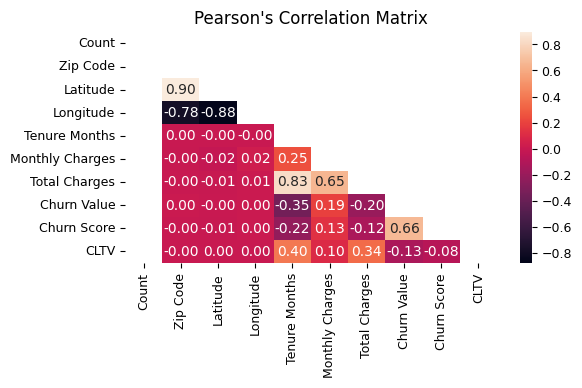

In [ ]:
corr = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(6, 3))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", linecolor="c")
plt.title("Pearson's Correlation Matrix")
plt.show()

In [ ]:
df.drop(
    columns=["CustomerID", "Country", "State", "Lat Long", "Zip Code", "Count"],
    inplace=True,
    errors="ignore",
)

In [ ]:
df.isna().sum()

,0
City,0
Latitude,0
Longitude,0
Gender,0
Senior Citizen,0
Partner,0
Dependents,0
Tenure Months,0
Phone Service,0
Multiple Lines,0


In [ ]:
df["Total Charges"].fillna(df["Total Charges"].mean(), inplace=True) # Filling missing total charge with

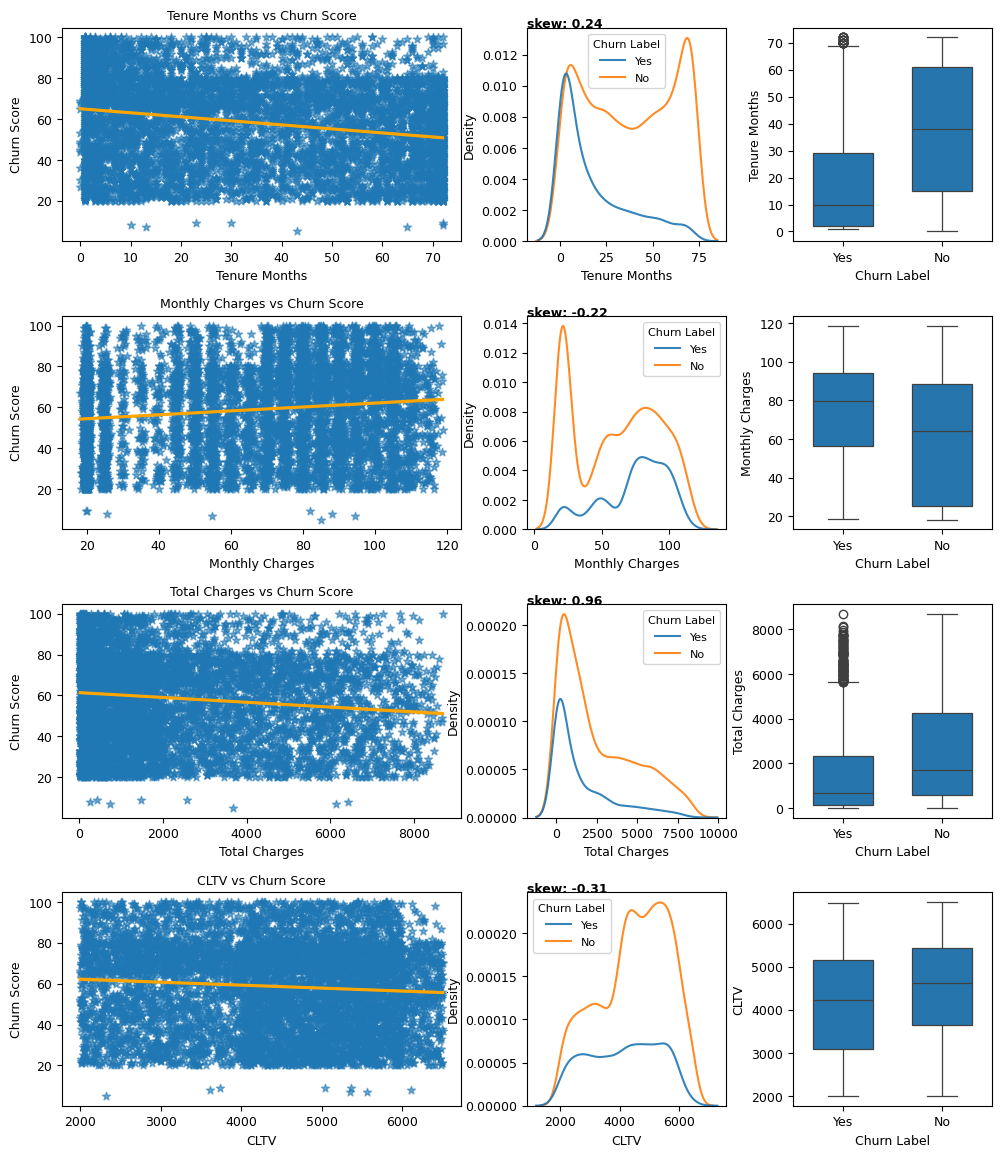

In [ ]:
# Before applying log
number_columns = df.select_dtypes("number").drop(
    columns="Latitude,Longitude,Churn Value,Churn Score".split(",")
)

skewness_before_log = df[number_columns.columns].skew()
fig, axes = plt.subplots(
    nrows=4,
    ncols=3,
    figsize=(12, 14),
    gridspec_kw={"hspace": 0.35, "wspace": 0.25, "width_ratios": [0.6, 0.3, 0.3]},
)
axes = axes.flatten()
i = 0
for column in number_columns.columns:
    ax = axes[i]
    sns.regplot(
        data=df,
        x=column,
        y="Churn Score",
        ax=ax,
        scatter_kws={"alpha": 0.6},
        marker="*",
        line_kws={"color": "orange"},
    )
    ax.set_title(f"{column} vs Churn Score", size=9)
    ax = axes[i + 1]
    sns.kdeplot(
        data=df, x=column, hue="Churn Label", ax=ax, fill=False, alpha=0.9, legend=True
    )
    skewness = skewness_before_log[column]
    ax.text(
        ax.get_xlim()[0],
        ax.get_ylim()[-1],
        f"skew: {skewness:.2f}",
        size=9,
        weight="bold",
    )
    legend = ax.get_legend()
    plt.setp(legend.get_title(), fontsize=8)
    for text in legend.get_texts():
        text.set_fontsize(8)

    ax = axes[i + 2]
    sns.boxplot(
        data=df,
        x="Churn Label",
        y=column,
        ax=ax,
        width=0.6,
        saturation=0.9,
        linewidth=0.9,
    )
    i += 3

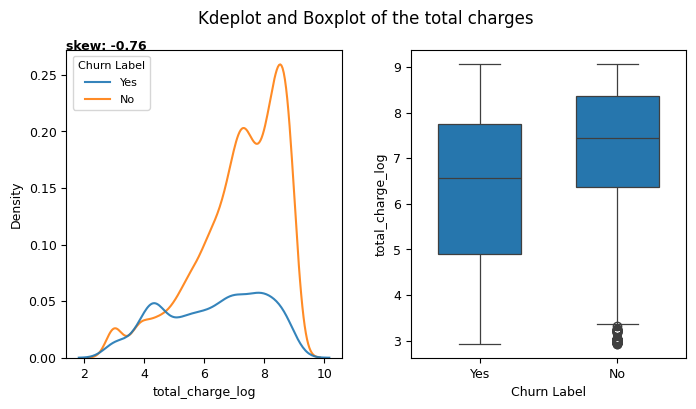

In [ ]:
# After applying log
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(8, 4),
    gridspec_kw={"hspace": 0.35, "wspace": 0.25, "width_ratios": [0.3, 0.3]},
)

axes = axes.flatten()

df_copy = df.copy()
df_copy["total_charge_log"] = df_copy["Total Charges"].apply(np.log)
skewness = df_copy["total_charge_log"].skew()

ax = axes[0]
sns.kdeplot(
    data=df_copy, x="total_charge_log", hue="Churn Label", ax=ax, fill=False, alpha=0.9
)
ax.text(
    ax.get_xlim()[0], ax.get_ylim()[-1], f"skew: {skewness:.2f}", size=9, weight="bold"
)
legend = ax.get_legend()
plt.setp(legend.get_title(), fontsize=8)
for text in legend.get_texts():
    text.set_fontsize(8)

ax = axes[1]
sns.boxplot(
    data=df_copy,
    x="Churn Label",
    y="total_charge_log",
    ax=ax,
    width=0.6,
    saturation=0.9,
    linewidth=0.9,
)
plt.suptitle("Kdeplot and Boxplot of the total charges")
plt.show()

In [ ]:
# OneHotEncoding with pandas' get dummies

df_copy = pd.get_dummies(df, columns=df.select_dtypes("O").columns)
print("Shape before encoding: ", df.shape)
print("Shape after encoding: ", df_copy.shape)

df_copy.head()

Shape before encoding:  (7043, 27)
Shape after encoding:  (7043, 1202)


,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,City_Acampo,City_Acton,City_Adelanto,City_Adin,City_Agoura Hills,City_Aguanga,City_Ahwahnee,City_Alameda,City_Alamo,City_Albany,City_Albion,City_Alderpoint,City_Alhambra,City_Aliso Viejo,City_Alleghany,City_Alpaugh,City_Alpine,...,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Churn Label_No,Churn Label_Yes,Churn Reason_Attitude of service provider,Churn Reason_Attitude of support person,Churn Reason_Competitor had better devices,Churn Reason_Competitor made better offer,Churn Reason_Competitor offered higher download speeds,Churn Reason_Competitor offered more data,Churn Reason_Deceased,Churn Reason_Don't know,Churn Reason_Extra data charges,Churn Reason_Lack of affordable download/upload speed,Churn Reason_Lack of self-service on Website,Churn Reason_Limited range of services,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction
0,33.964131,-118.272783,2,53.85,108.15,1,86,3239,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,34.059281,-118.307420,2,70.70,151.65,1,67,2701,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,34.048013,-118.293953,8,99.65,820.50,1,86,5372,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,34.062125,-118.315709,28,104.80,3046.05,1,84,5003,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,34.039224,-118.266293,49,103.70,5036.30,1,89,5340,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
def chi_square_test(dataframe: DataFrame):

    columns = ["Phone Service", "Contract", "Senior Citizen"]
    p_value = []
    dofs = []
    chi_square = []
    for column in columns:
        crosstab = pd.crosstab(
            index=dataframe[column], columns=dataframe["Churn Label"]
        )
        chi_value, p, dof, ev = chi2_contingency(crosstab)
        chi_square.append(chi_value)
        dofs.append(dof)
        p_value.append(p)

    return pd.DataFrame(
        {
            "column": columns,
            "test_statistic": np.round(chi_square),
            "degree_of_freedom": dof,
            "p_value": np.round(p_value, 2),
        }
    )

In [ ]:
chi_table = chi_square_test(df)
chi_table["Decision"] = np.where(
    chi_table.p_value < 0.05, "significant", "not significant"
)
chi_table

,column,test_statistic,degree_of_freedom,p_value,Decision
0,Phone Service,1.0,1,0.34,not significant
1,Contract,1185.0,1,0.00,significant
2,Senior Citizen,159.0,1,0.00,significant
